# Sales Forecasting System

# Dataset

## Description

## Source

## Why are we using it?

In [33]:
import pandas as pd
import numpy as np

In [34]:
dataframe = pd.read_csv("archive/car_prices.csv")

display(dataframe.head())

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


# EDA

In [35]:
dataframe.shape

(558837, 16)

In [36]:
dataframe["year"].unique() # vehicle years

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003, 2002, 2001, 2000, 1999, 1998, 1995, 1996, 1997, 1987,
       1994, 1993, 1992, 1989, 1991, 1990, 1986, 1985, 1988, 1984, 1982,
       1983])

In [37]:
dataframe.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

In [38]:
dataframe.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
saledate         object
dtype: object

In [39]:
print(dataframe.isnull().sum())

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64


In [40]:
# Impute/drop missing? Decision to take

In [43]:
#dataframe["saledate"] = pd.to_datetime(dataframe["saledate"])
#dataframe.iloc[2896, :]
#DATE_FORMAT = '%a %b %d %Y %H:%M:%S GMT%z (%Z)' # this raises an error as well

# RUN THIS FIRST (UNCOMMENT BELOW)

#dataframe["saledate"] = dataframe["saledate"].str.replace(r' \((.*?)\)', '', regex=True)
#dataframe
DATE_FORMAT = '%a %b %d %Y %H:%M:%S GMT%z'
dataframe["saledate"] = pd.to_datetime(
    dataframe["saledate"],
    format=DATE_FORMAT,
    errors='coerce'
)

print(dataframe["saledate"].head())
dataframe.dtypes


0   2014-12-16 12:30:00-08:00
1   2014-12-16 12:30:00-08:00
2   2015-01-15 04:30:00-08:00
3   2015-01-29 04:30:00-08:00
4   2014-12-18 12:30:00-08:00
Name: saledate, dtype: datetime64[ns, UTC-08:00]


year                                int64
make                               object
model                              object
trim                               object
body                               object
transmission                       object
vin                                object
state                              object
condition                         float64
odometer                          float64
color                              object
interior                           object
seller                             object
mmr                               float64
sellingprice                      float64
saledate        datetime64[ns, UTC-08:00]
dtype: object

In [44]:
dataframe['sale_year'] = dataframe['saledate'].dt.year
dataframe['sale_month'] = dataframe['saledate'].dt.month
dataframe['sale_week'] = dataframe['saledate'].dt.isocalendar().week
dataframe['sale_day'] = dataframe['saledate'].dt.day
dataframe['sale_dayofweek'] = dataframe['saledate'].dt.dayofweek  # Monday=0
dataframe['sale_quarter'] = dataframe['saledate'].dt.quarter

dataframe.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,...,seller,mmr,sellingprice,saledate,sale_year,sale_month,sale_week,sale_day,sale_dayofweek,sale_quarter
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,...,kia motors america inc,20500.0,21500.0,2014-12-16 12:30:00-08:00,2014.0,12.0,51,16.0,1.0,4.0
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,...,kia motors america inc,20800.0,21500.0,2014-12-16 12:30:00-08:00,2014.0,12.0,51,16.0,1.0,4.0
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,...,financial services remarketing (lease),31900.0,30000.0,2015-01-15 04:30:00-08:00,2015.0,1.0,3,15.0,3.0,1.0
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,...,volvo na rep/world omni,27500.0,27750.0,2015-01-29 04:30:00-08:00,2015.0,1.0,5,29.0,3.0,1.0
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,...,financial services remarketing (lease),66000.0,67000.0,2014-12-18 12:30:00-08:00,2014.0,12.0,51,18.0,3.0,4.0


In [45]:
dataframe['saledate'].min(), dataframe['saledate'].max()


(Timestamp('2014-01-01 09:15:00-0800', tz='UTC-08:00'),
 Timestamp('2015-03-06 07:00:00-0800', tz='UTC-08:00'))

<Axes: xlabel='saledate'>

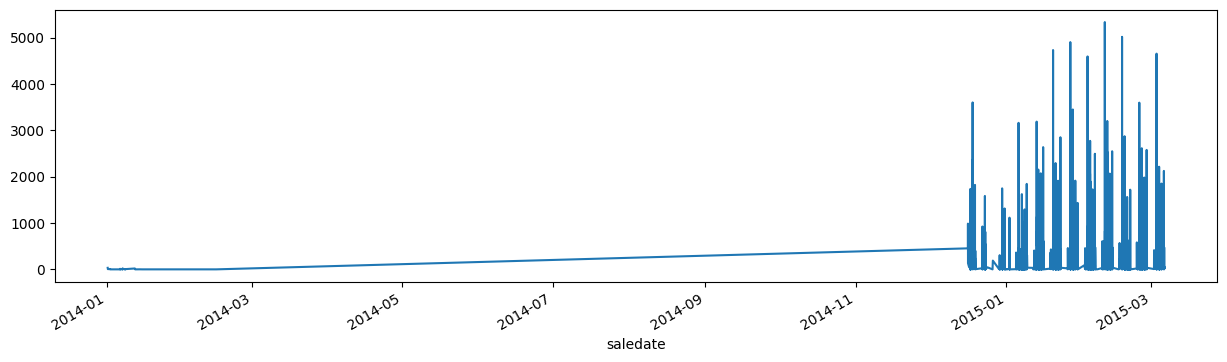

In [46]:
import matplotlib

dataframe['saledate'].value_counts().sort_index().plot(figsize=(15,4))


In [47]:
full_range = pd.date_range(dataframe['saledate'].min(), dataframe['saledate'].max(), freq='D')
missing_days = full_range.difference(dataframe['saledate'].dt.date.unique())
print("Missing days:", len(missing_days))

Missing days: 429


## Statistical Summary & Data Quality

In [48]:
# Display descriptive statistics for numerical columns
print("=" * 80)
print("DESCRIPTIVE STATISTICS")
print("=" * 80)
display(dataframe.describe())

DESCRIPTIVE STATISTICS


,year,condition,odometer,mmr,sellingprice,sale_year,sale_month,sale_week,sale_day,sale_dayofweek,sale_quarter
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000,395489.000000,395489.000000,395489.0,395489.000000,395489.000000,395489.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810,2014.864150,3.093547,10.432568,15.668653,2.120276,1.405978
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628,0.342629,3.576198,13.818117,8.380668,1.033083,1.026216
min,1982.000000,1.000000,1.000000,25.000000,1.000000,2014.000000,1.000000,1.0,1.000000,0.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000,2015.000000,1.000000,4.0,8.000000,1.000000,1.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000,2015.000000,2.000000,7.0,17.000000,2.000000,1.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000,2015.000000,2.000000,9.0,23.000000,3.000000,1.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000,2015.000000,12.000000,52.0,31.000000,6.000000,4.000000


## Missing Values Analysis

In [49]:
# Calculate missing value percentages
missing_info = pd.DataFrame({
    'Column': dataframe.columns,
    'Missing_Count': dataframe.isnull().sum().values,
    'Missing_Percentage': (dataframe.isnull().sum().values / len(dataframe) * 100).round(2)
})

missing_info = missing_info[missing_info['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print("\nMissing Values Summary:")
display(missing_info)
print(f"\nTotal rows: {len(dataframe)}")
print(f"Rows with at least one missing value: {dataframe.isnull().any(axis=1).sum()}")


Missing Values Summary:


,Column,Missing_Count,Missing_Percentage
19,sale_day,163348,29.23
21,sale_quarter,163348,29.23
18,sale_week,163348,29.23
16,sale_year,163348,29.23
17,sale_month,163348,29.23
15,saledate,163348,29.23
20,sale_dayofweek,163348,29.23
5,transmission,65352,11.69
4,body,13195,2.36
8,condition,11820,2.12



Total rows: 558837
Rows with at least one missing value: 225328


## Categorical Columns Analysis

In [50]:
# Analyze categorical columns
categorical_cols = dataframe.select_dtypes(include=['object']).columns.tolist()
print(f"\nTotal Categorical Columns: {len(categorical_cols)}")
print("\nUnique values per categorical column:")

for col in categorical_cols:
    unique_count = dataframe[col].nunique()
    print(f"\n{col}: {unique_count} unique values")
    if unique_count <= 20:
        print(dataframe[col].value_counts())


Total Categorical Columns: 10

Unique values per categorical column:

make: 96 unique values

model: 973 unique values

trim: 1963 unique values

body: 87 unique values

transmission: 4 unique values
transmission
automatic    475915
manual        17544
sedan            15
Sedan            11
Name: count, dtype: int64

vin: 550297 unique values

state: 64 unique values

color: 46 unique values

interior: 17 unique values
interior
black        244329
gray         178581
beige         59758
tan           44093
—             17077
brown          8640
red            1363
blue           1143
silver         1104
off-white       480
purple          339
gold            324
white           256
green           245
burgundy        191
orange          145
yellow           20
Name: count, dtype: int64

seller: 14263 unique values


## Numerical Columns Distribution

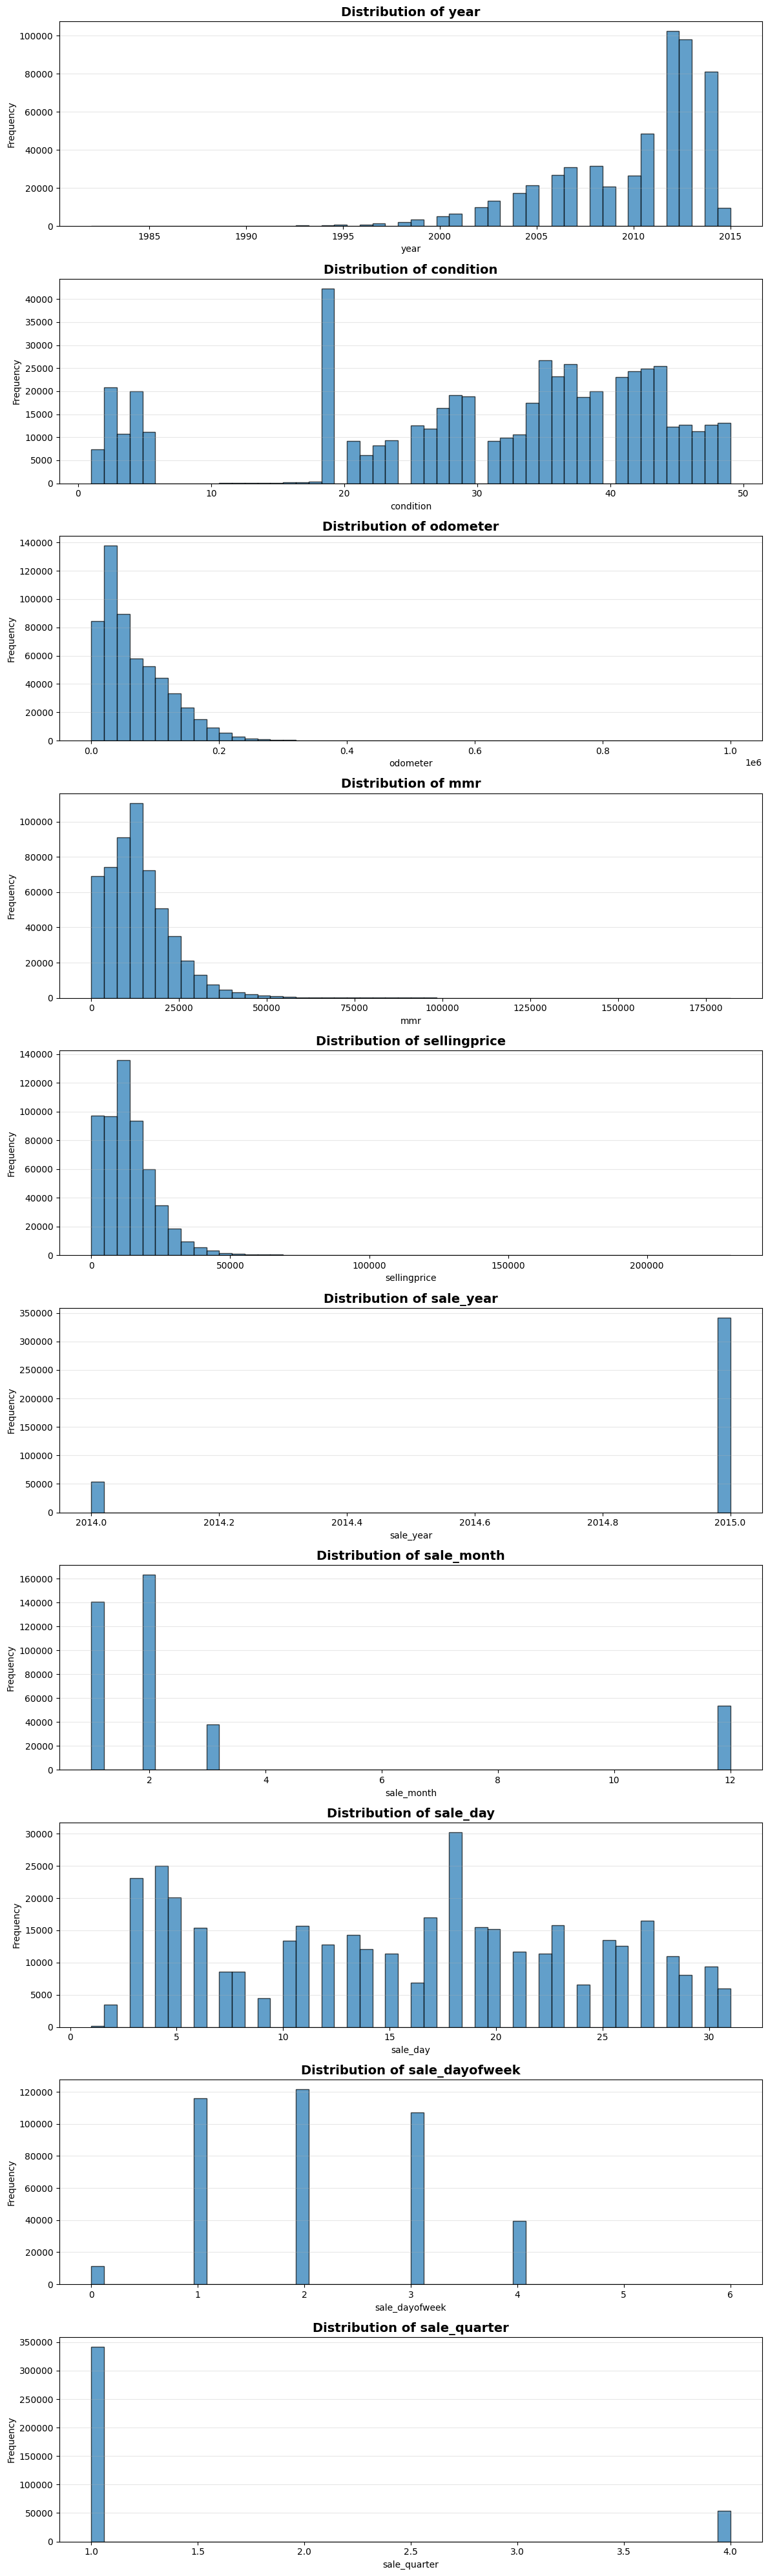

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create distribution plots for numerical columns
numerical_cols = dataframe.select_dtypes(include=['int64', 'float64']).columns
fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(12, 4*len(numerical_cols)))

if len(numerical_cols) == 1:
    axes = [axes]

for idx, col in enumerate(numerical_cols):
    axes[idx].hist(dataframe[col].dropna(), bins=50, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {col}', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## Correlation Analysis

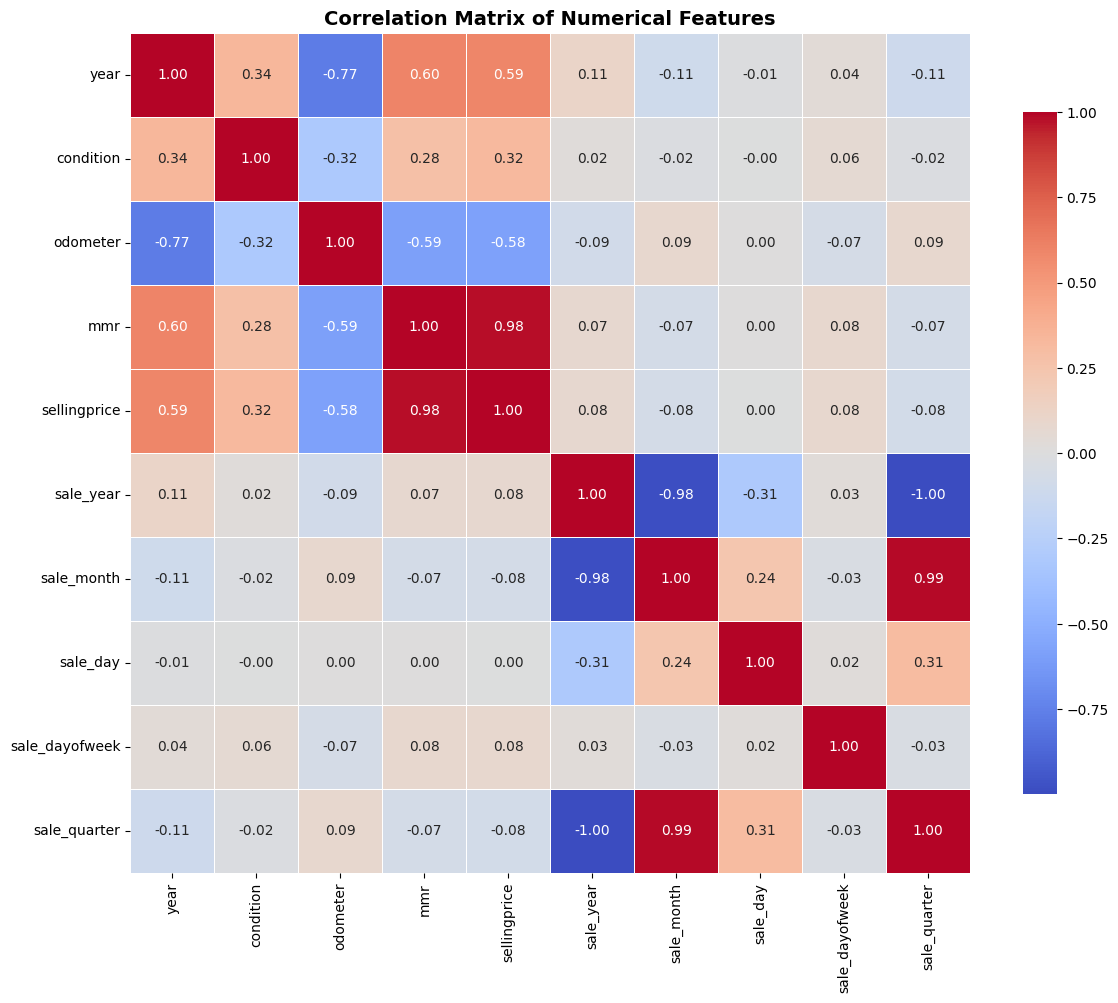


Highest Correlations with 'price' (if available):


In [52]:
# Compute correlation matrix for numerical columns
numerical_data = dataframe.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_data.corr()

# Create correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Print top correlations with price (if exists)
print("\nHighest Correlations with 'price' (if available):")
if 'price' in correlation_matrix.columns:
    correlations = correlation_matrix['price'].sort_values(ascending=False)
    print(correlations)

## Time Series Analysis - Sales Volume Over Time

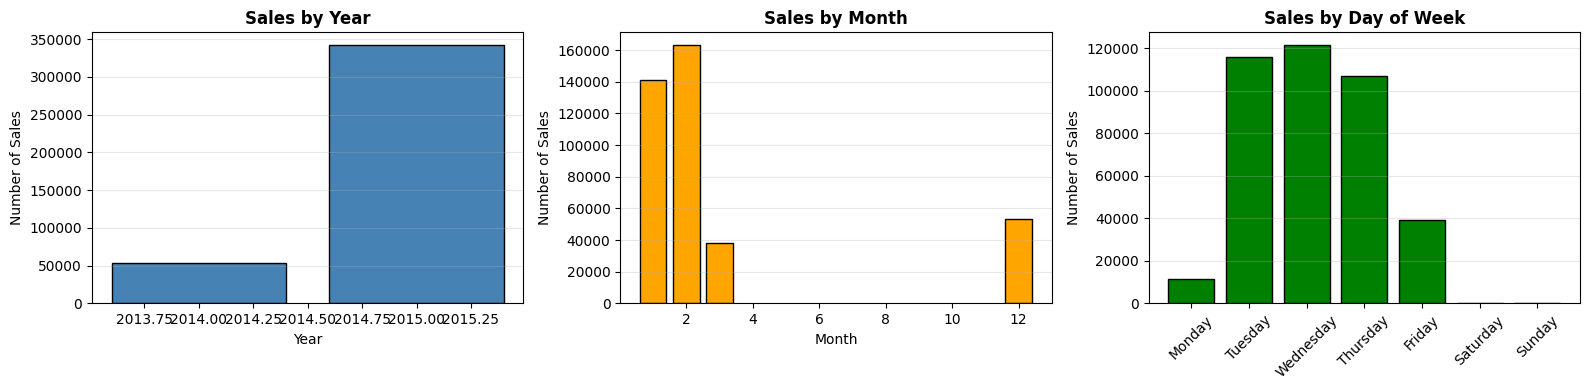

In [53]:
# Analyze sales by year and month
sales_by_year = dataframe.groupby('sale_year').size()
sales_by_month = dataframe.groupby('sale_month').size()
sales_by_dayofweek = dataframe.groupby('sale_dayofweek').size()

fig, axes = plt.subplots(1, 3, figsize=(16, 4))

# Sales by Year
axes[0].bar(sales_by_year.index, sales_by_year.values, color='steelblue', edgecolor='black')
axes[0].set_title('Sales by Year', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Sales')
axes[0].grid(axis='y', alpha=0.3)

# Sales by Month
axes[1].bar(sales_by_month.index, sales_by_month.values, color='orange', edgecolor='black')
axes[1].set_title('Sales by Month', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Number of Sales')
axes[1].grid(axis='y', alpha=0.3)

# Sales by Day of Week
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
axes[2].bar(range(len(sales_by_dayofweek)), sales_by_dayofweek.values, color='green', edgecolor='black')
axes[2].set_xticks(range(len(day_names)))
axes[2].set_xticklabels(day_names, rotation=45)
axes[2].set_title('Sales by Day of Week', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Number of Sales')
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## Regional Analysis - Top States & Manufacturers


TOP 15 STATES BY SALES:
state
fl    82945
ca    73148
pa    53907
tx    45913
ga    34750
nj    27784
il    23486
nc    21845
oh    21575
tn    20895
mo    16013
mi    15511
nv    12685
va    12027
md    11158
Name: count, dtype: int64


TOP 15 MANUFACTURERS (Make) BY SALES:
make
Ford             93554
Chevrolet        60197
Nissan           53946
Toyota           39871
Dodge            30710
Honda            27206
Hyundai          21816
BMW              20719
Kia              18077
Chrysler         17276
Mercedes-Benz    17141
Jeep             15372
Infiniti         15305
Volkswagen       12581
Lexus            11861
Name: count, dtype: int64


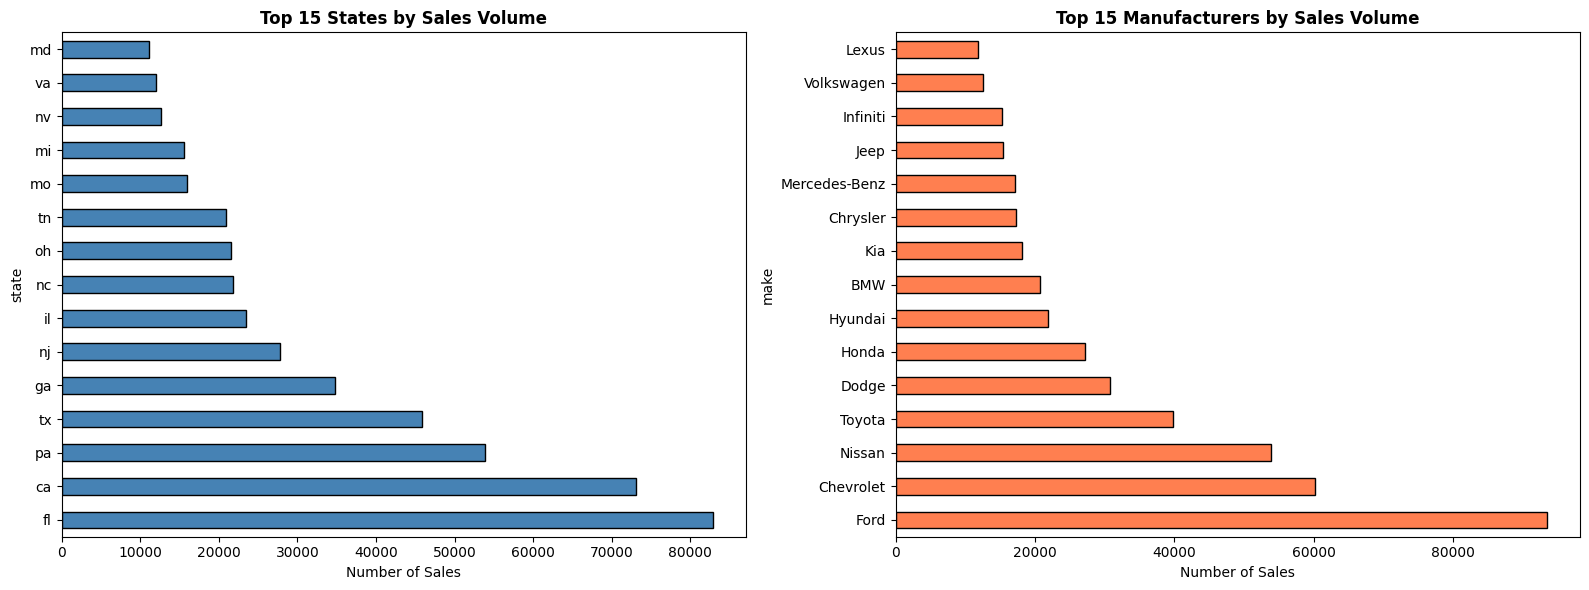

In [54]:
# Identify key states and makes for forecasting
print("\nTOP 15 STATES BY SALES:")
top_states = dataframe['state'].value_counts().head(15)
print(top_states)

print("\n\nTOP 15 MANUFACTURERS (Make) BY SALES:")
top_makes = dataframe['make'].value_counts().head(15)
print(top_makes)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top States
top_states.plot(kind='barh', ax=axes[0], color='steelblue', edgecolor='black')
axes[0].set_title('Top 15 States by Sales Volume', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Number of Sales')

# Top Makes
top_makes.plot(kind='barh', ax=axes[1], color='coral', edgecolor='black')
axes[1].set_title('Top 15 Manufacturers by Sales Volume', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Number of Sales')

plt.tight_layout()
plt.show()

## Key Insights & Data Preparation Notes

In [55]:
# Summary statistics for forecasting
print("\n" + "="*80)
print("EDA SUMMARY FOR SALES FORECASTING")
print("="*80)

print(f"\n📊 DATASET OVERVIEW:")
print(f"  • Total Records: {len(dataframe):,}")
print(f"  • Date Range: {dataframe['saledate'].min()} to {dataframe['saledate'].max()}")
if pd.notna(dataframe['saledate'].min()) and pd.notna(dataframe['saledate'].max()):
    print(f"  • Total Days: {(dataframe['saledate'].max() - dataframe['saledate'].min()).days}")

print(f"\n📍 GEOGRAPHIC DISTRIBUTION:")
print(f"  • Unique States: {dataframe['state'].nunique()}")
print(f"  • Top State: {dataframe['state'].value_counts().index[0]} ({dataframe['state'].value_counts().values[0]} sales)")

print(f"\n🚗 MARKET COMPOSITION:")
print(f"  • Unique Manufacturers: {dataframe['make'].nunique()}")
print(f"  • Unique Models: {dataframe['model'].nunique()}")
print(f"  • Top Make: {dataframe['make'].value_counts().index[0]} ({dataframe['make'].value_counts().values[0]} sales)")

print(f"\n💰 PRICING INSIGHTS:")
if 'sellingprice' in dataframe.columns:
    print(f"  • Average Price: ${dataframe['sellingprice'].mean():,.2f}")
    print(f"  • Median Price: ${dataframe['sellingprice'].median():,.2f}")
    print(f"  • Price Range: ${dataframe['sellingprice'].min():,.2f} - ${dataframe['sellingprice'].max():,.2f}")

print(f"\n📈 SEASONALITY INDICATORS:")
if 'sale_month' in dataframe.columns and dataframe['sale_month'].notna().any():
    print(f"  • Average Sales per Month: {dataframe.groupby('sale_month').size().mean():.0f}")
    if dataframe['sale_month'].value_counts().shape[0] > 0:
        print(f"  • Peak Month: {dataframe['sale_month'].value_counts().index[0]} with {dataframe['sale_month'].value_counts().values[0]} sales")
if 'sale_dayofweek' in dataframe.columns and dataframe['sale_dayofweek'].notna().any():
    print(f"  • Avg Sales per Day of Week: {dataframe.groupby('sale_dayofweek').size().mean():.0f}")

print("\n" + "="*80)


EDA SUMMARY FOR SALES FORECASTING

📊 DATASET OVERVIEW:
  • Total Records: 558,837
  • Date Range: 2014-01-01 09:15:00-08:00 to 2015-03-06 07:00:00-08:00
  • Total Days: 428

📍 GEOGRAPHIC DISTRIBUTION:
  • Unique States: 64
  • Top State: fl (82945 sales)

🚗 MARKET COMPOSITION:
  • Unique Manufacturers: 96
  • Unique Models: 973
  • Top Make: Ford (93554 sales)

💰 PRICING INSIGHTS:
  • Average Price: $13,611.36
  • Median Price: $12,100.00
  • Price Range: $1.00 - $230,000.00

📈 SEASONALITY INDICATORS:
  • Average Sales per Month: 98872
  • Peak Month: 2.0 with 163053 sales
  • Avg Sales per Day of Week: 56498



# Future Goals

## Forecasting
### Multi-level Forecasting

- Sales per state
- Sales per make

### External Regressors

- Fuel Price Index
- Interest Rates Data

## Dashboard

### Interactive Time-Series Dashboard
- Using Streamlit

- Forecasted VS Actual Sales
- Region-wise heatmap of sales
- Make-wise bar charts
- Manufacturer -> View Model Sales -> View Prediction

### Future Price Dynamics

- **Predict**: future price trends for each make/model
e.g., "Used Toyota Corolla prices are expected to rise 3% in next 6 months."

### Condition-Based Forecasting

- **Forecast** sales by condition

## Extra

### State-level market classification

- Cluster states by: average selling price, average odometer, most popular makes.

Organize into:

- Budget markets
- Luxury markets
- High-volume states